In [1]:
!pip3 install -r requirements.txt --quiet

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (22,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
URL = 'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/refs/heads/main/customer_churn/Churn_Modelling.csv'
df = pd.read_csv(URL)
df.drop(columns=['RowNumber','CustomerId'], inplace=True)
df.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
664,Akeroyd,661,France,Female,41,1,0.00,2,0,1,131300.68,0
4590,Thomson,635,France,Female,78,6,47536.40,1,1,1,119400.08,0
8873,Rogers,610,France,Male,34,0,103108.17,1,0,0,125646.82,0
513,Isayev,734,France,Male,34,6,133598.40,1,1,1,13107.24,0
9581,Glover,850,France,Female,28,9,0.00,2,1,1,164864.67,0


In [4]:
n_rows, n_cols = df.shape
print(f"There are {n_rows} rows and {n_cols} columns in the dataset.")

There are 10000 rows and 12 columns in the dataset.


In [5]:
#Dropping Columns with more than 50% null values
null_df = pd.DataFrame(df.isnull().sum()/len(df)*100)\
        .reset_index().rename(columns={'index':'Column', 0: 'Null_Pct'})\
        .sort_values(by='Null_Pct', ascending=False).reset_index(drop=True)
null_df

,Column,Null_Pct
0,Surname,0.0
1,CreditScore,0.0
2,Geography,0.0
3,Gender,0.0
4,Age,0.0
5,Tenure,0.0
6,Balance,0.0
7,NumOfProducts,0.0
8,HasCrCard,0.0
9,IsActiveMember,0.0


In [6]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
for col in cat_cols:
    uniques = sorted(df[col].unique().tolist())
    mapping = {val: idx for idx, val in enumerate(uniques)}  # Create a mapping dictionary
    df[col] = df[col].map(mapping)  # Replace values using the mapping

If the p-value is greater than 0.05, the result is typically considered not statistically significant.

In hypothesis testing:

- A p-value ≤ 0.05 suggests that there is enough evidence to reject the null hypothesis, implying the result is statistically significant.
- A p-value > 0.05 means there is not enough evidence to reject the null hypothesis, suggesting the result is not statistically significant.

So, for statistical significance, the p-value should be less than or equal to 0.05 (or another chosen significance level).

In [7]:
def correlation_test(df):
    from scipy import stats
    pearson_stat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
    pearson_p = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])
    spearman_stat = df.corr(method=lambda x, y: stats.spearmanr(x, y)[0])
    spearman_p = df.corr(method=lambda x, y: stats.spearmanr(x, y)[1])

    pearson_p = (pearson_p - np.eye(df.shape[1])).round(4)
    spearman_p = (spearman_p - np.eye(df.shape[1])).round(4)

    return pearson_stat, pearson_p, spearman_stat, spearman_p

corr = correlation_test(df)
corr_cols = list(corr[1][corr[1]['Exited'] <= 0.05]['Exited'].index)

In [8]:
df = df[corr_cols]

In [9]:
print(f"Columns after dropping unrelated columns : {df.shape[1]}")

Columns after dropping unrelated columns : 8


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,0,0,42,0.00,1,1,1
1,608,2,0,41,83807.86,1,1,0
2,502,0,0,42,159660.80,3,0,1
3,699,0,0,39,0.00,2,0,0
4,850,2,0,43,125510.82,1,1,0


**Pseudo Code for Logistic Regression**:

1.	**Initialize**:
    -	Get features and labels.
    -	Initialize weights ￼ and bias term ￼ (usually set to small random values).
2.	**Logits Calculation**:
￼   -	This is the linear combination of the input features with the weights. But logistic regression typically doesn’t involve a slope ￼ or intercept￼ as in linear regression. Instead, it uses a weight vector for all features and a bias term.

3.	**Apply Sigmoid Function**:-	This converts the logits to probabilities.
4.	**Prediction**:
    -	Convert probabilities to binary class labels (0 or 1) using a threshold, usually 0.5.
    -	If ￼, predict class 1; otherwise, predict class 0.
5.	**Cost Function**:-	Use binary cross-entropy (log-loss) as the cost function to measure prediction error:
6.	**Gradient Descent**:-	Adjust weights ￼ and bias ￼ iteratively using the gradients of the cost function:
7.	**Repeat**:-	Repeat steps 2 to 6 for a number of iterations (or until convergence).

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=-1)

In [12]:
X = df.drop(columns='Exited').values
y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train Shape : {X_train.shape} and X_test Shape : {X_test.shape}")
print(f"y_train Shape : {y_train.shape} and y_test Shape : {y_test.shape}")

X_train Shape : (8000, 7) and X_test Shape : (2000, 7)
y_train Shape : (8000,) and y_test Shape : (2000,)


In [13]:
model.fit(X_train, y_train)

LogisticRegression()



In logistic regression, **non-linearity** is introduced through the sigmoid function applied to the linear combination of the input features. Here’s how it works:

1.	Linear Combination:
    - The model first computes a linear combination of the input features using $
\text{logit} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$
2.	Sigmoid Activation:
    - After calculating the logits, the sigmoid function is applied
    - The sigmoid function maps the linear combination (logits) to a probability value between 0 and 1, introducing non-linearity. This mapping is essential because it allows the model to output probabilities for binary classification.
3.	Decision Boundary:
    - The sigmoid function creates a decision boundary that is non-linear in the original feature space. The model can classify the input into different classes based on whether the sigmoid output is above or below a certain threshold (commonly 0.5).

In summary, the non-linearity in logistic regression arises from the sigmoid activation function applied to the logits or (linear combination). The linear combination itself does not introduce non-linearity; it is the transformation through the sigmoid that allows logistic regression to model complex relationships between the input features and the output class probabilities.

In [14]:
#Gives the values before sigmoid (aka Logits) and the model has to be fitted first
model.decision_function(X_train) 

array([-3.33369733, -2.14633109, -1.42694804, ..., -2.02283114,
       -0.66426928, -1.31040896])

In [15]:
# Manually compute the mean and standard deviation for y and y_pred
def evaluate_model(y, y_pred):
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_pred_mean = np.mean(y_pred)
    y_pred_std = np.std(y_pred)

    # True Positives are the correctly classified cases
    # False Positives are false alarms. There was no need of flagging these cases but we flagged them as danger
    # False Negatives are cases where we should have flagged them but we didn't

    TP = len(y_train[(y_pred == 1) & (y_train == 1)])  # True Positives
    FP = len(y_train[(y_pred == 1) & (y_train == 0)])  # False Positives
    FN = len(y_train[(y_pred == 0) & (y_train == 1)])  # False Negatives
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)

    return {'Precision': float(precision), 'Recall': float(recall)}

y_pred = model.predict(X_train)
metric_df = pd.DataFrame(evaluate_model(y_train, y_pred).items(), columns=['Metric', 'Value'])
metric_df

,Metric,Value
0,Precision,0.594360
1,Recall,0.166667


In [16]:
probs = model.predict_proba(X_train)
probs_df = pd.DataFrame(probs)
probs_df['Prediction'] = y_pred
probs_df.head()

,0,1,Prediction
0,0.965567,0.034433,0
1,0.895325,0.104675,0
2,0.806425,0.193575,0
3,0.673311,0.326689,0
4,0.386673,0.613327,1


In [17]:
TP = len(y_train[(y_pred == 1) & (y_train == 1)])                   # True Positives
FP = len(y_train[(y_pred == 1) & (y_train == 0)])                   # False Positives
FN = len(y_train[(y_pred == 0) & (y_train == 1)])                   # False Negatives

#how many of the actual positives were correctly predicted:
recall = TP / (TP + FN)

#How many cases were correctly identified                 
precision = TP / (TP + FP)

print(f"TP : {TP}, FP : {FP}, Precision : {round(precision,4)}")
print(f"TP : {TP}, FN : {FN}, Recall : {round(recall,4)}")

TP : 274, FP : 187, Precision : 0.5944
TP : 274, FN : 1370, Recall : 0.1667


- True Positives are the correctly classified cases
- False Positives are false alarms. There was no need of flagging these cases but we flagged them as danger
- False Negatives are cases where we should have flagged them but we didn't

In [22]:
from sklearn.metrics import roc_curve, auc # type: ignore

# Assuming model is already trained and X_test is your test data
y_scores = probs[:, 1]

# Calculate ROC curve (actual values, their probabilities)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

#index where the value is max
idx = np.argmax(tpr - fpr)

# Find the optimal threshold (this is just an example, you need to define your own logic)
optimal_threshold = thresholds[idx] 

# Make predictions based on the optimal threshold
y_pred = (y_scores >= optimal_threshold).astype(int)

metrics = evaluate_model(y_train, y_pred)
print(f"Precision : {round(metrics['Precision'],4)}")
print(f"Recall : {round(metrics['Recall'],4)}")

Precision : 0.3553
Recall : 0.6551


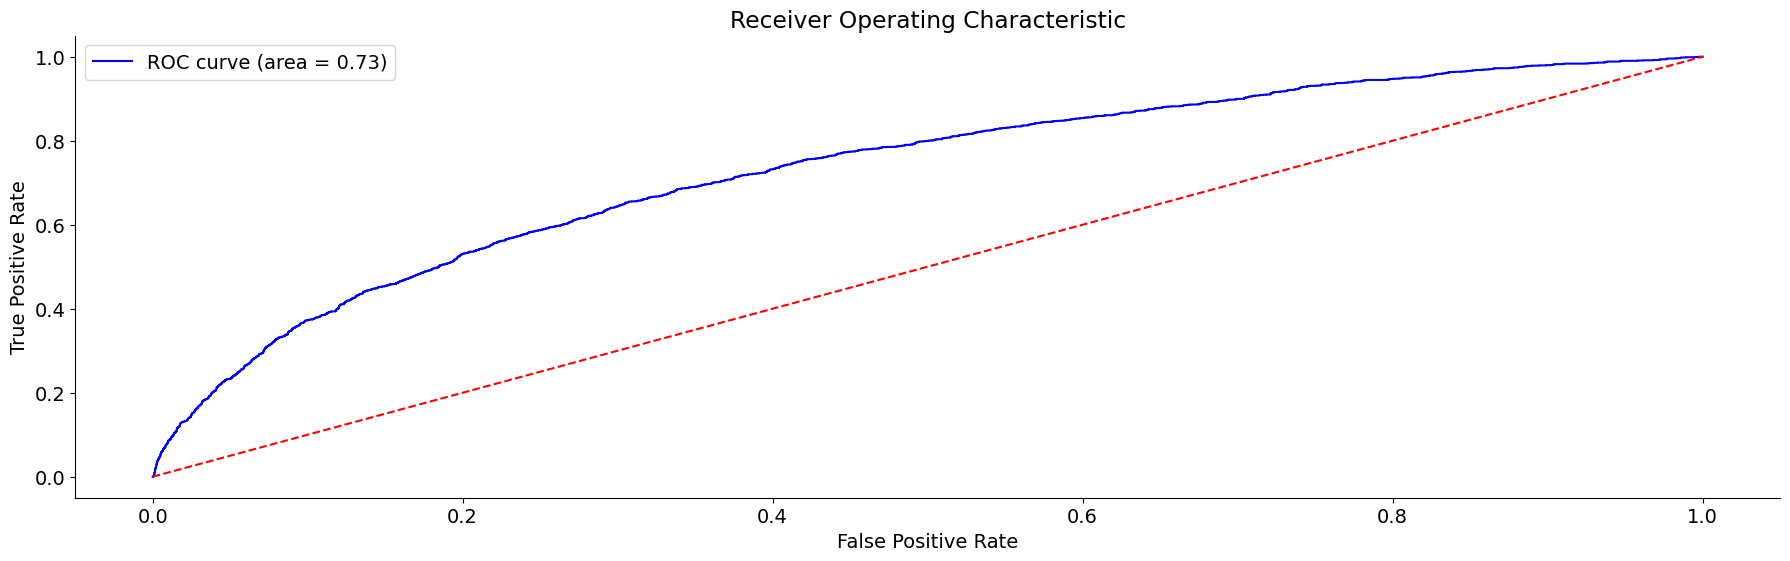

In [23]:
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='upper left')
plt.show()